In [1]:
#과제하기 전 한글폰트 출력 활성화
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/GULIM.TTC' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
plt.rcParams.update({'font.size': 11})

# 1.
갑기업은 동일한 원료를 사용하여 제품 A와 B를 생산하는 기업이다. 제품 A 1리터를 생산하기 위해서는 원료 5리터가 사용되고, 제품 B 1리터를 생산하기 위해서는 원료 9리터가 사용된다.
또한 제품 A 1리터와 B 1리터를 생산하는데 소요되 는 시간은 각각 1.5시간과 1시간이다.
하루에 사용가능한 원료의 양은 최대 50리터이며 제품생산에 활용할 수 있는 작업 시간은 최대 하루 8시간이라고 한다

Maximize A+B
A=5x+1.5y
B=9x+1y
constraint x<50
constraint y<8

In [2]:
#(1)제품 A 1리터와 B 1리터의 생산/판매에서 발생하는 이익이 각각 9만원과 10만원이라고 할 때 이익극대화를 위해서 갑
#기업이 제품 A와 B를 하루에 몇 리터씩 생산해야 하는지를 결정하기 위한 파이썬 프로그램과 실행결과를 제시하시오.

from pulp import *
model = LpProblem(name="LP_Problem", sense=LpMaximize)
x1=LpVariable(name="A생산량", lowBound=0) #A생산량
x2=LpVariable(name="B생산량", lowBound=0) #B생산량

model+= 5*x1 + 9*x2 <= 50, "part_constraint"
model+= 1.5*x1 + x2 <= 8, "time_constraint"

model+= 9*x1 + 10*x2
print(model)
model.solve()


LP_Problem:
MAXIMIZE
9*A생산량 + 10*B생산량 + 0
SUBJECT TO
part_constraint: 5 A생산량 + 9 B생산량 <= 50

time_constraint: 1.5 A생산량 + B생산량 <= 8

VARIABLES
A생산량 Continuous
B생산량 Continuous



1

In [3]:
#(2) 이익극대화를 위한 제품 A와 B의 최적생산량은 각각 얼마인지 설명하시오
for var in model.variables():
    print(var.name,':', var.value())


A생산량 : 2.5882353
B생산량 : 4.1176471


In [4]:
#(3) 제품 A와 B를 최적생산량만큼 생산/판매할 경우 총이익은 얼마인지 설명하시오.
print("총이익 최대값: ", model.objective.value())

총이익 최대값:  64.47058870000001


# 2.
갤러리백화점은 현재 사용중인 잠실점을 증축함으로써 추가로 50,000 𝑚2의 백화점 공간을 마련할 수 있다고 한다. 추
가로 확보하는 공간에 입점시킬 매장 후보는 5개이고 각 매장에 필요한 면적과 각 매장으로부터 예상되는 연 이익은 아
래 자료와 같다. 

In [5]:
#(1) 갤러리백화점이 추가로 입점시킬 매장들로부터 예상되는 총이익을 극대화시키기 위하여 어떤 매장들을 입점시킬지
#결정하기 위한 파이썬 프로그램과 실행결과를 제시하시오
from pulp import *
model = LpProblem(name="LP_Problem", sense=LpMaximize)

x1=LpVariable(name="A매장", lowBound=0, cat="Binary")
x2=LpVariable(name="B매장", lowBound=0, cat="Binary")
x3=LpVariable(name="C매장", lowBound=0, cat="Binary")
x4=LpVariable(name="D매장", lowBound=0, cat="Binary")
x5=LpVariable(name="E매장", lowBound=0, cat="Binary")

model+= 35*x1 + 28*x2 + 10*x3 + 10*x4 + 8*x5 <=50, "area_constraint"
model+= 10*x1 + 7*x2 + 3*x3 + 2.8*x4 + 2.5*x5

print(model)
model.solve()

LP_Problem:
MAXIMIZE
10*A매장 + 7*B매장 + 3*C매장 + 2.8*D매장 + 2.5*E매장 + 0.0
SUBJECT TO
area_constraint: 35 A매장 + 28 B매장 + 10 C매장 + 10 D매장 + 8 E매장 <= 50

VARIABLES
0 <= A매장 <= 1 Integer
0 <= B매장 <= 1 Integer
0 <= C매장 <= 1 Integer
0 <= D매장 <= 1 Integer
0 <= E매장 <= 1 Integer



1

In [6]:
#(2) 이익극대화를 위하여 입점시킬 매장들은 어느 것들인지 설명하고 이 때 예상되는 총이익은 얼마인지 설명하시오
for var in model.variables():
    if var.value(): #var.value()가 1인 애들의 변수값 출력
        print(var.name)
print("총이익 최대값: ", model.objective.value())

A매장
C매장
총이익 최대값:  13.0


# 3.
옵션가격을 결정하는 변수들의 값이 같은 경우 시간이 경과함에 따라(옵션잔존만기가 감소함에 따라) 풋옵션의 가격은
감소한다고 한다. 예를 들어 주가는 10,000원, 주가변동성은 30%, 무위험수익률은 2%인 경우 행사가격 10,000원인
풋옵션의 가격은 시간 경과에 따라 다음 그래프와 같이 변동한다.
현재 옵션잔존만기가 6개월인 경우 위와 같은 그래프를 생성하기 위한 파이썬 프로그램과 실행결과를 제시하시오.

<ipython-input-7-183e7e6f33b0>:7: RuntimeWarning: invalid value encountered in double_scalars
  d1=(log(S/K)+(r+0.5*sigma**2)*(T))/(sigma*sqrt(T))


(0.515, 0.005, 34.544803206505094, 841.6771886260758)

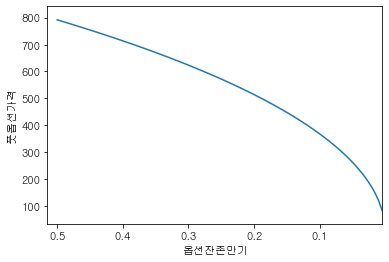

In [7]:
#블랙-숄즈 모형을 이용한 풋옵션 가격 계산

import numpy as np
from scipy.stats import norm
from math import *
def BS_put(S,K,r,sigma,T):
    d1=(log(S/K)+(r+0.5*sigma**2)*(T))/(sigma*sqrt(T))
    d2=d1-sigma*sqrt(T)
    
    put_price=K*exp(-r*(T))*norm.cdf(-d2,0,1) - S*norm.cdf(-d1,0,1)
    return put_price

L=100
S=10000
r=0.02
sigma=0.3
K=10000
T=np.linspace(0.5,0,L)
puts=[]

for i in range(0,L):
    price=BS_put(S,K,r,sigma,T[i])
    puts.append(price)

import matplotlib.pyplot as plt
plt.xlabel('옵션잔존만기')
plt.ylabel('풋옵션가격')
plt.plot(T,puts)
plt.axis([max(T)+0.015,min(T)+0.005,min(puts)-50,max(puts)+50])
#잔존만기가 다가올수록 옵션가격이 떨어지는 것을 볼 수가 있음

# 4.
종목코드.xlsx 파일에는 각 수강생별로 한국거래소에 상장되어 있는 주식 종목들이 할당되어 있다

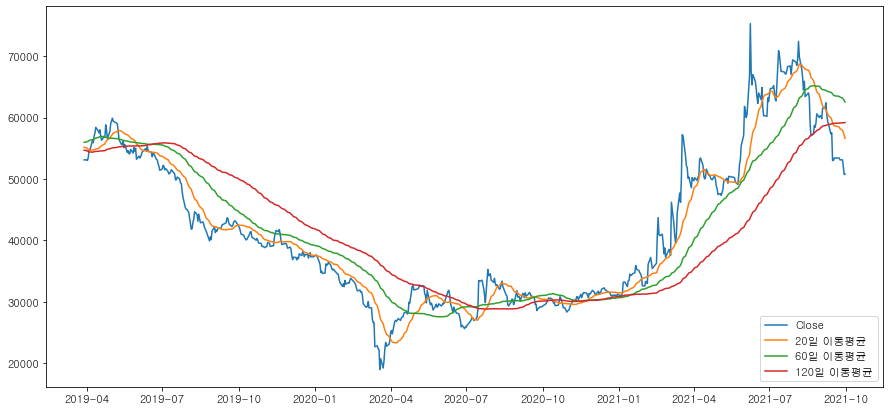

In [8]:
#(1)2018년 10월 1일부터 2021년 9월 30일까지 주가자료를 이용하여 해당 종목의 종가, 20일 이동평균, 60일 이동평균,
#120일 이동평균선을 하나의 그래프에 생성하기 위한 파이썬 프로그램과 실행결과를 제시하시오.

from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

종목명='사조산업'
종목코드="007160.KS"

start = datetime.datetime(2018,10,1)
end = datetime.datetime(2021,9,30)

data=pdr.get_data_yahoo(종목코드, start,end)
data['20일 이동평균']=data['Close'].rolling(20).mean()
data['60일 이동평균']=data['Close'].rolling(60).mean()
data['120일 이동평균']=data['Close'].rolling(120).mean()
data.dropna(inplace=True)

plt.figure(figsize=(15,7))
plt.plot(data[['Close','20일 이동평균', '60일 이동평균', '120일 이동평균']])
plt.legend(['Close','20일 이동평균', '60일 이동평균', '120일 이동평균'],loc='lower right')

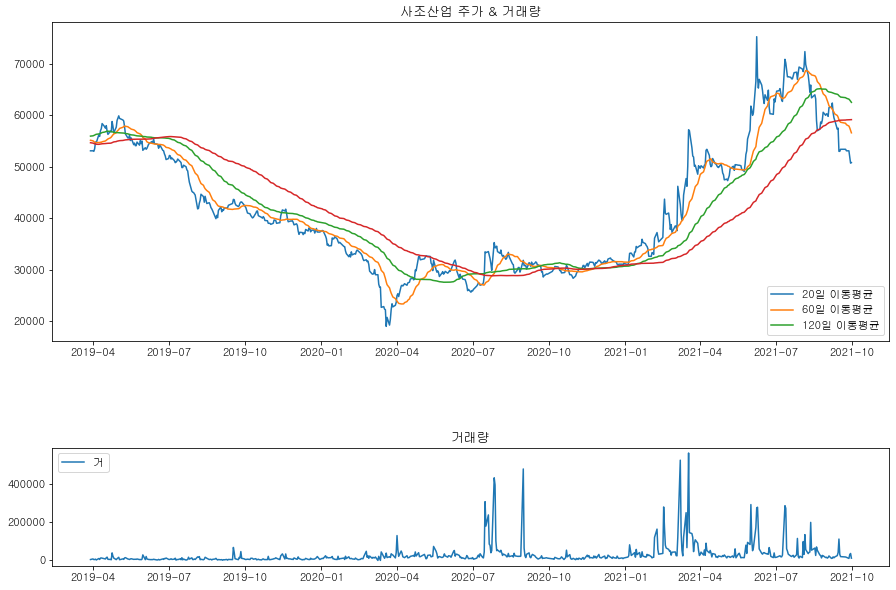

,High,Low,Open,Close,Volume,Adj Close,20일 이동평균,60일 이동평균,120일 이동평균
Date,,,,,,,,,
2019-03-29,53800.0,52800.0,53600.0,53100.0,4658.0,52549.714844,55150.0,55960.000000,54672.916667
2019-04-01,54000.0,52800.0,52800.0,53100.0,7861.0,52549.714844,55040.0,56014.166667,54597.083333
2019-04-02,53600.0,52600.0,53600.0,53000.0,4518.0,52450.750000,54900.0,56073.333333,54524.583333
2019-04-03,53500.0,52800.0,53000.0,53500.0,4716.0,52945.570312,54760.0,56151.666667,54467.916667
2019-04-04,55500.0,53400.0,53500.0,54800.0,6628.0,54232.097656,54730.0,56253.333333,54419.583333


In [9]:
#주가만 출력하기 심심해서 거래량도 같이 출력해봤습니다.
fig = plt.figure(figsize=(15, 10))
top_axes = plt.subplot2grid((5,4), (0,0), rowspan=3, colspan=4)
top_axes.set_title(종목명+' 주가 & 거래량')

bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom_axes.set_title('거래량')

top_axes.plot(data[['Close','20일 이동평균', '60일 이동평균', '120일 이동평균']])
top_axes.legend(['20일 이동평균', '60일 이동평균', '120일 이동평균'],loc='lower right')

bottom_axes.plot(data['Volume']) #심심해서 거래량도 표기해봤습니다!
bottom_axes.legend('거래량',loc='upper left') #어라?..... 
plt.show()
data.head()


In [11]:
!pip install mpl_finance

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+
No handles with labels found to put in legend.


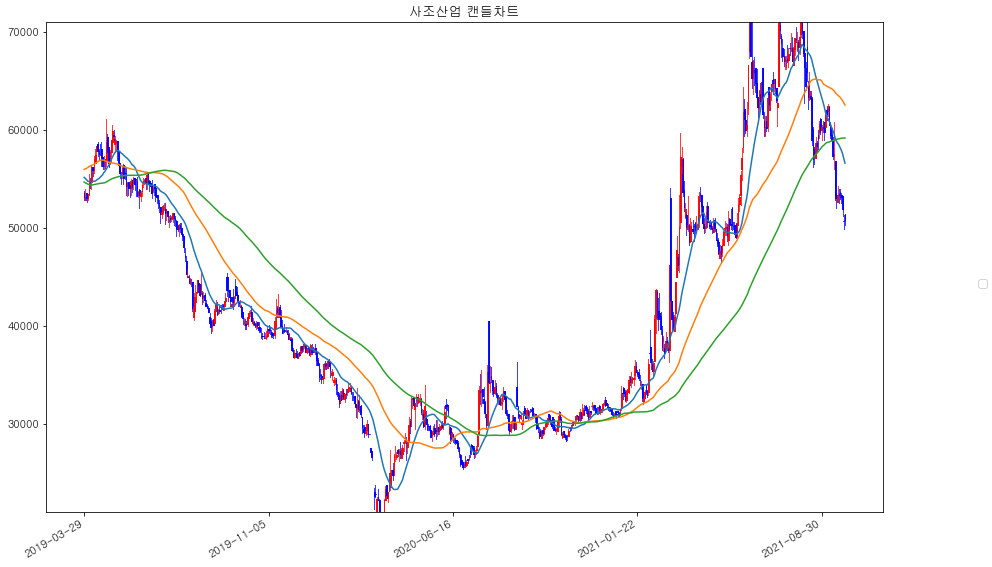

In [12]:
#심심해서 봉 그래프에 이동평균선을 출력해보았습니다.
#[출처] [누구나 따라 하는 금융데이터 분석] - 파이썬에서 캔들차트 그리기|작성자 알파스퀘어#심심해서 봉 그래프로도 출력해봄
#!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
index = data.index.astype('str') #캔들차트를 그려주는 모듈에서 인덱스가 문자열 형태여야 오류 없이 잘 나옴 ㅠ

fig, ax = plt.subplots(figsize=(15,10)) # 여기서 차트 크기를 조정 할 수 있습니다.

# 아래 명령어를 통해 시고저종 데이터를 통해 캔들 차트를 그립니다.
candlestick2_ohlc(ax,data['Open'],data['High'],
                  data['Low'],data['Close'],width=0.6,colorup='r',colordown='b',)

ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

# 아래는 날짜 인덱싱을 위한 함수 입니다.
def mydate(x,pos):
    try:
        return index[int(x-0.1)]
    except IndexError:
        return ''

ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))
ax.plot(index,data[['20일 이동평균', '60일 이동평균', '120일 이동평균']])
ax.set_title(종목명+' 캔들차트')
fig.autofmt_xdate()
fig.legend(loc=7)#이거 해야 범례가 생긴다.

# 차트 타이틀을 지정 할 수 있습니다.
plt.show()


[*********************100%***********************]  1 of 1 completed


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,사조산업
Date,
2018-10-01,62200.0
2018-10-02,61700.0
2018-10-04,60300.0
2018-10-05,60600.0
2018-10-08,59800.0
...,...
2021-09-23,53400.0
2021-09-24,53100.0
2021-09-27,53100.0


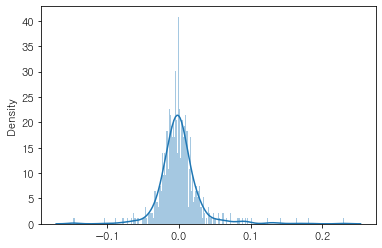

In [13]:
#(2)2018년 10월 1일부터 2021년 9월 30일까지 주가자료를 이용하여 해당 종목의 종가를 기준으로 계산된 일 수익률의
#분포 그래프를 생성하기 위한 파이썬 프로그램과 실행결과를 제시하시오

import pandas as pd
import seaborn as sns
import datetime
import yfinance as yf

#이평선 그리느라 120일치 데이터 삭제했으므로 다시 다운해야함

종목명='사조산업'
종목코드="007160.KS"

start = datetime.datetime(2018,10,1)
end = datetime.datetime(2021,9,30)

data=pd.DataFrame()
data[종목명]=yf.download(종목코드,start,end)['Close']

일수익률=data.pct_change()
#일수익률.plot.hist(bins=100,title=종목명+' 일수익률 분포그래프')
sns.distplot(일수익률, bins=300)
data

In [14]:
#(3)2018년 10월 1일부터 2021년 9월 30일까지 주가자료를 이용하여 해당 종목의 월평균(월말기준) 주가를 계산하기
#위한 파이썬 프로그램과 실행결과를 제시하시오.
data_=data.resample('M').mean()
data_

,사조산업
Date,
2018-10-31,55166.666667
2018-11-30,53402.380952
2018-12-31,51213.157895
2019-01-31,55234.090909
2019-02-28,58211.764706
2019-03-31,55150.000000
2019-04-30,56554.545455
2019-05-31,55876.190476
2019-06-30,53794.736842


# 5.
갑기업은 동일한 부품을 사용하여 제품 A와 B를 생산하는 기업이다. 제품 A 1개를 생산하기 위해서는 부품 5개가 사용
되고 제품 B 1개를 생산하기 위해서는 부품 9개가 사용된다. 또한 제품 A 1개와 B 1개를 생산하는데 소요되는 시간은 각
각 1.5시간과 1시간이다. 하루에 사용할 수 있는 부품의 갯수는 50개이며 제품생산에 활용할 수 있는 작업시간은 하루 8
시간이라고 한다.

In [15]:
#(1)제품 A 1개와 B 1개의 생산/판매에서 발생하는 이익은 각각 9만원과 10만원이라고 할 때 이익극대화를 위해서 갑기업
#이 제품 A와 B를 하루에 몇 개씩 생산해야 하는지를 결정하기 위한 파이썬 프로그램과 실행결과를 제시하시오.

from pulp import *
model = LpProblem(name="LP_Problem", sense=LpMaximize)
x1=LpVariable(name="A생산량", lowBound=0, cat='Integer') #A생산량
x2=LpVariable(name="B생산량", lowBound=0, cat='Integer') #B생산량

model+= 5*x1 + 9*x2 <= 50, "part_constraint"
model+= 1.5*x1 + x2 <= 8, "time_constraint"

model+= 9*x1 + 10*x2
print(model)
model.solve()



LP_Problem:
MAXIMIZE
9*A생산량 + 10*B생산량 + 0
SUBJECT TO
part_constraint: 5 A생산량 + 9 B생산량 <= 50

time_constraint: 1.5 A생산량 + B생산량 <= 8

VARIABLES
0 <= A생산량 Integer
0 <= B생산량 Integer



1

In [24]:
#(2) 이익극대화를 위한 제품 A와 B의 최적생산량은 각각 얼마인지 설명하시오
for var in model.variables():
    print(var.name,':', format(var.value(),'.0f'), "개")


A생산량 : 1 개
B생산량 : 5 개


In [26]:
#(3) 제품 A와 B를 최적생산량만큼 생산/판매할 경우 총이익은 얼마인지 설명하시오.
print("총이익 최대값: ", format(model.objective.value(),'.0f'))

총이익 최대값:  59


# 6
행사가격이 1,000원이고 knockout 가격이 1,500원인 Knockout 콜옵션의 가격을 Monte Carlo simulation을 활용하여 계산하기 위한 파이썬 프로그램과 실행결과를 제시하시오. 단, 현재 주가는 1,000원, 주가변동성은 30%, 무위험이자율은 2%, 옵션잔존만기는 1년으로 가정한다

In [18]:
import numpy as np
S,X,sigma,r,T=1000,1000,0.3,0.02,1

M=300000
payoff_list=np.zeros(M)

for i in range(0,M):
    epsilon=np.random.randn()
    ST=S*np.exp((r-0.5*sigma**2)*T+sigma*epsilon*np.sqrt(T))
    if ST<1500:
        payoff=np.max([ST-X,0])
    else:
        payoff=0
        
    payoff_list[i]=payoff
    
payoff_average=np.mean(payoff_list)
call_price=payoff_average/((1+r)**T)
print("콜옵션 가격: ", format(call_price,'.3f'),"원")


콜옵션 가격:  74.184 원


# 7
주식 A, B, C, D의 분산공분산행렬은 다음과 같다
A, B, C, D 네 주식들로 구성되는 최소분산포트폴리오를 탐색하기 위한 파이썬 프로그램과 실행결과를 제시하고, 최소분산포트폴리오의 분산값과 최소분산포트폴리오의
각 주식의 투자가중치에 대하여 설명하시오. 단, 각 주식의 투자가중치들이
모두 0보다 크거나 같은 값을 가져야 한다

In [19]:
H=[[0.1, 0.03, -0.08, 0.05],
 [0.03, 0.2, 0.02, 0.03],
 [-0.08, 0.02, 0.3, 0.2],
 [0.05, 0.03, 0.2, 0.9]]

In [20]:
import numpy as np
from scipy.optimize import minimize,Bounds

x0=[0.25,0.25,0.25,0.25] #투자가중치 초기값

limits=Bounds(np.zeros((4,1)),np.ones((4,1)))
var= lambda x: np.dot(np.dot(x,H),x)
cons={'type':'eq', 'fun': lambda x: np.sum(x)-1}
globalminport=minimize(var, x0, constraints=cons, bounds=limits)

print(globalminport, '\n\n', type(globalminport),'\n\n') #딕셔너리 자료형인듯
var=globalminport['fun'] #최소분산값
x=globalminport['x'] #투자가중치

print('분산: ', var)
print('투자가중치: ', x)

     fun: 0.04089099526085313
     jac: array([0.08178209, 0.08178167, 0.08178189, 0.18574416])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.62180179, 0.08151563, 0.29668257, 0.        ]) 

 <class 'scipy.optimize.optimize.OptimizeResult'> 


분산:  0.04089099526085313
투자가중치:  [0.62180179 0.08151563 0.29668257 0.        ]


# 8
2021년 10월 12일 현재 삼성전자의 종가는 69,000원이다. 삼성전자의 주가변동성은 25%, 기대수익률은 20%라고 가정
하여 보자. 3개월 후 삼성전자의 주가분포 그래프를 생성하기 위한 파이썬 프로그램과 실행결과를 제시하시오

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='주가분포', ylabel='Density'>

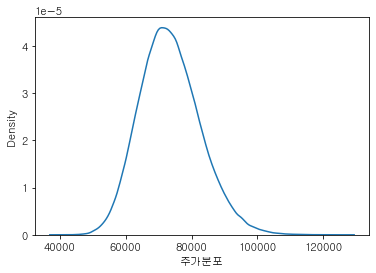

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

s0,mu,sigma,T=69900, 0.2, 0.25,0.25
#현재주가, 기대수익률, 표준편차, 잔존만기
M=300000
price=[]

for i in range(0,M):
    epsilon=np.random.randn()
    sT=s0*np.exp((mu-0.5*sigma**2)*T+sigma*epsilon*np.sqrt(T)).round(2)
    price.append(sT)
df=pd.DataFrame({'주가분포': price})

sns.distplot(df['주가분포'],hist=False)